In [17]:

import numpy as np
import pandas as pd
import datetime as dt
import random

 
from pairs_trader_core import read_yf_data, PairsTrader, load_iv_data
from pairs_analysis_utils import run_single_pair_parallel
import matplotlib.pyplot as plt
%matplotlib inline

/Users/am/06302025/pairs_trader_core.py:365: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


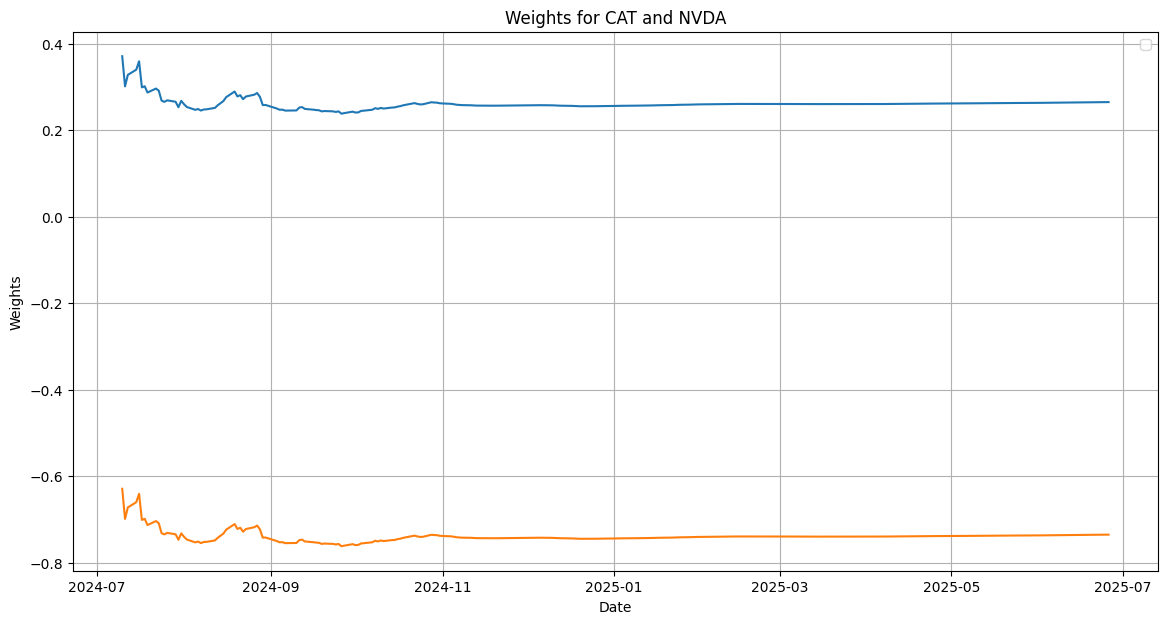

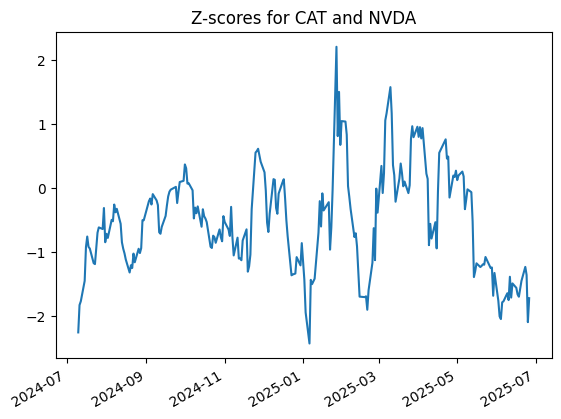

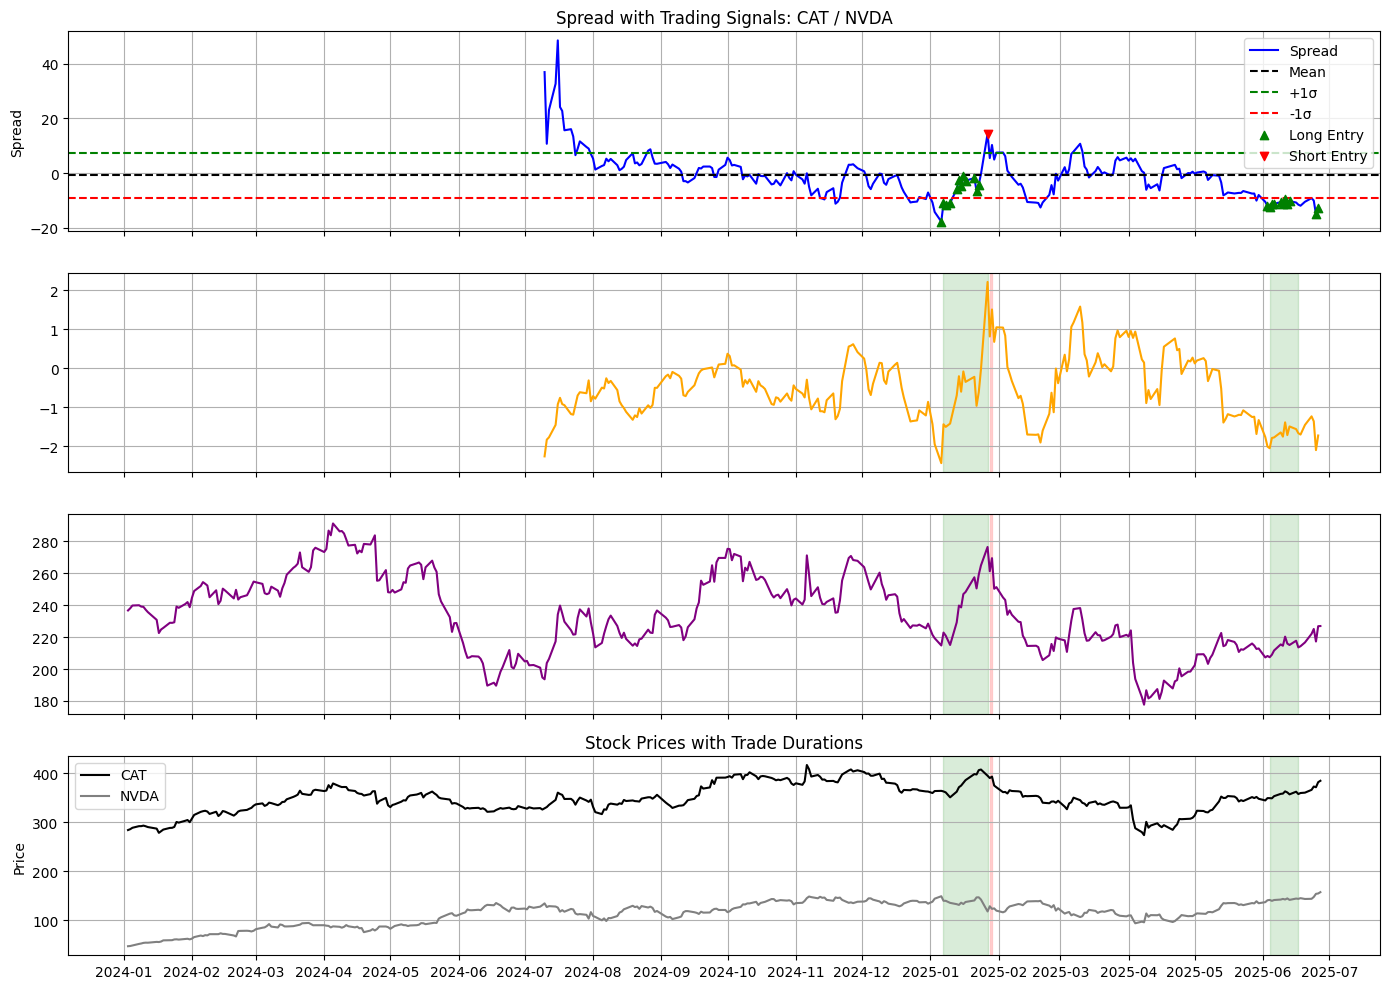

,Entry Date,Entry Z-Score,Entry Position,Stock 1,Stock 2,Stock 1 Entry Price,Stock 2 Entry Price,Weight Stock 1,Weight Stock 2,Option Type 1,Option Type 2,Entry Option Size 1,Entry Option Size 2,Option 1 Entry Price,Option 2 Entry Price,IV Stock 1 Entry,IV Stock 2 Entry,Entry Option Cost,Exit Date,Exit Z-Score,Stock 1 Exit Price,Stock 2 Exit Price,Exit Weight Stock 1,Exit Weight Stock 2,Duration,Option 1 Exit Price,Option 2 Exit Price,IV Stock 1 Exit,IV Stock 2 Exit,Exit Option Value,Realized Return
0,2025-01-07,-2.432548,1,CAT,NVDA,363.000000,140.139999,0.256320,-0.743680,call,put,0.256320,0.743680,15.906449,8.504918,0.297300,0.464007,10.402077,2025-01-27,-0.027039,394.980011,118.419998,0.256320,-0.743680,13,18.412331,9.961960,0.317737,0.635632,12.127957,0.165917
1,2025-01-28,2.211832,-1,CAT,NVDA,390.290009,128.990005,0.258737,-0.741263,call,put,0.258737,0.741263,17.227749,10.022643,0.299649,0.588549,11.886874,2025-01-29,0.813815,393.230011,123.699997,0.258737,-0.741263,2,17.188188,11.806255,0.296502,0.718698,13.198763,0.110364
2,2025-06-04,-2.008097,1,CAT,NVDA,349.329987,141.919998,0.263227,-0.736773,call,put,0.263227,0.736773,13.392040,6.568650,0.257224,0.358687,8.364749,2025-06-17,-1.561191,357.679993,144.119995,0.263227,-0.736773,10,14.348033,6.922909,0.270219,0.371489,8.877400,0.061287


In [18]:
stock_pairs = pd.read_csv('stable_pairs.csv')
#for i in range(len(stock_pairs)):
#    print(f"{i}: {stock_pairs.iloc[i][0]} - {stock_pairs.iloc[i][1]}")
import random
rand_pair = random.randint(0, len(stock_pairs)-1)
pair = ["CAT",
"NVDA"]

# Assuming yf_data is a DataFrame with historical prices for these stocks
yf_data = read_yf_data(file_name="yf_data1.csv")
iv_data = load_iv_data()  # Load implied volatility data
#end_date = dt.now().strftime("%Y-%m-%d")
#start_date = (pd.to_datetime(end_date) - timedelta(days=2*365)).strftime("%Y-%m-%d")
end_date,start_date ='2025-06-27', '2024-01-03'

#end_date = dt.datetime.now().strftime("%Y-%m-%d")
#start_date = (dt.datetime.now() - dt.timedelta(days=int(3.0*365))).strftime("%Y-%m-%d")
yf_data.index = pd.to_datetime(yf_data.index)
trader = PairsTrader(pair[0],pair[1], start_date, end_date,
                      yf_data=yf_data,
                      iv_data=iv_data,
                      use_options=True,
                      
                      )
trader.run_strategy()
trader.plot_weights()
#trader.spread_series.plot(title=f"Spread for {pair[0]} and {pair[1]}")

trader.z_scores.plot(title=f"Z-scores for {pair[0]} and {pair[1]}")


trader.plot_positions()


plt.show()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pd.DataFrame(trader.trade_log)
